In [1]:
import random
import neat
import pickle
from tronlib import *

def main(config):
    
    with open("best.genome", 'rb') as f:
        best_genome = pickle.load(f)
    
    best_bot = NNBot(best_genome, config)

    board = TronBoard(10, 10, (3, 4), (5, 4), (1, 0), (1, 0))
    bot1 = SimpleBot()
    game = TronGame(board, bot1, best_bot, show=True)

    last_board = game.board.board

    def init():
        im.set_data(game.board.board)
        return (im,)


    def animate(i):
        global last_board
        if game.board.gameover:
            data = last_board
        else:
            game.update()
            data = game.board.board
        im.set_array(data)
        last_board = data
        return (im,)

    fig = plt.figure()
    x, y = game.board.board.shape
    #ax = plt.axes(xlim=(0, x), ylim=(0, y))
    #line, = ax.plot([], [], lw=2)
    im=plt.imshow(game.board.board,interpolation='nearest')

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

    return anim

In [2]:
%matplotlib inline

Bot 1:  [ 0 -1] [3 3]
Bot 2:  [1 0] [6 4]
Bot 1:  [-1  0] [2 3]
Bot 2:  [1 0] [7 4]
Bot 1:  [0 1] [2 4]
Bot 2:  [1 0] [8 4]
Bot 1:  [0 1] [2 5]
Bot 2:  [0 1] [8 5]


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Bot 1:  [1 0] [3 5]
Bot 2:  [0 1] [8 6]
Bot 1:  [0 1] [3 6]
Bot 2:  [0 1] [8 7]
Bot 1:  [-1  0] [2 6]
Bot 2:  [-1  0] [7 7]
Bot 1:  [-1  0] [1 6]
Bot 2:  [-1  0] [6 7]
Bot 1:  [-1  0] [0 6]
Bot 2:  [-1  0] [5 7]
Bot 1:  [ 0 -1] [0 5]
Bot 2:  [-1  0] [4 7]
Bot 1:  [1 0] [1 5]
Bot 2:  [-1  0] [3 7]
Bot 1:  [ 0 -1] [1 4]
Bot 2:  [-1  0] [2 7]
Bot 1:  [ 0 -1] [1 3]
Bot 2:  [-1  0] [1 7]
Bot 1:  [ 0 -1] [1 2]
Bot 2:  [0 1] [1 8]
Bot 1:  [ 0 -1] [1 1]
Bot 2:  [0 1] [1 9]
Bot 1:  [ 0 -1] [1 0]
Bot 2:  [0 1] [1 9]
Game over, winner is: 1


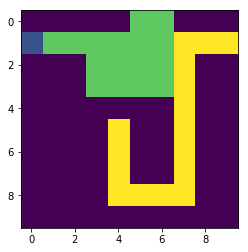

In [3]:
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     "tron.config")

anim = main(config)
from IPython.display import HTML
HTML(anim.to_html5_video())